# Import Libs

In [50]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, auc ,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from scipy.stats import f_oneway
import seaborn as sns
# !pip install statsmodels
# !pip install scipy

In [51]:
import warnings
# Filter out FutureWarnings and UserWarnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=UserWarning)



# Read Data

In [52]:
# read data
path = r"C:\Users\moham\OneDrive\Desktop\Proj AI\Algerian_forest_fires\data\raw\Algerian_forest_fires_dataset_UPDATE.csv"
data= pd.read_csv(path)
data

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,Bejaia Region Dataset
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,Bejaia Region Dataset
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,Bejaia Region Dataset
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,not fire,Bejaia Region Dataset
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,Bejaia Region Dataset
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,Sidi-Bel Abbes Region Dataset
240,27,9,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,Sidi-Bel Abbes Region Dataset
241,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,Sidi-Bel Abbes Region Dataset
242,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,Sidi-Bel Abbes Region Dataset


In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int64  
 1   month        244 non-null    int64  
 2   year         244 non-null    int64  
 3   Temperature  244 non-null    int64  
 4    RH          244 non-null    int64  
 5    Ws          244 non-null    int64  
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    object 
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    object 
 13  Classes      243 non-null    object 
 14  region       244 non-null    object 
dtypes: float64(5), int64(6), object(4)
memory usage: 28.7+ KB


In [54]:
data["day"]=data["day"].astype("object")
data["month"]=data["month"].astype("object")
data["year"]=data["year"].astype("object")


# Fixing columns names

In [55]:
data.columns=data.columns.str.strip()
data.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'region'],
      dtype='object')

# check nulls

In [56]:
print(data.isnull().sum())
# print(catData.isnull().sum())

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        1
region         0
dtype: int64


# show null rows

In [57]:
data[data.isnull().any(axis=1)]
# catData[catData.isnull().any(axis=1)]


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
165,14,7,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN,Sidi-Bel Abbes Region Dataset


In [58]:
indx = data[data.isnull().any(axis=1)].index[0]
print(indx)
data.at[indx,"Classes"] = data.at[indx,"FWI"]
data.at[indx,"FWI"]= np.nan
# indx = catData[catData.isnull().any(axis=1)].index[0]
# print(indx)
# catData.at[indx,"Classes"] = catData.at[indx,"FWI"]
# catData.at[indx,"FWI"]= np.nan


165


In [59]:
data[data.isna().any(axis=1)]
# catData[catData.isna().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
165,14,7,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,NaN,fire,Sidi-Bel Abbes Region Dataset


# check number of rows with null values 

In [60]:
data.isna().sum().sum()
# numData.isna().sum().sum()

1

# drop nulls

In [61]:
print(data.shape)
data.dropna(inplace=True)
print(data.shape)

(244, 15)
(243, 15)


In [62]:
# explore classes values
print(data["Classes"].value_counts())
data["Classes"] = data["Classes"].str.strip()
print(data["Classes"].value_counts())

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64
Classes
fire        137
not fire    106
Name: count, dtype: int64


In [63]:
data["region"]=data["region"].str.strip()

print(data["region"].value_counts())


region
Bejaia Region Dataset            122
Sidi-Bel Abbes Region Dataset    121
Name: count, dtype: int64


In [64]:
data

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,Bejaia Region Dataset
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,Bejaia Region Dataset
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,Bejaia Region Dataset
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,not fire,Bejaia Region Dataset
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,Bejaia Region Dataset
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,Sidi-Bel Abbes Region Dataset
240,27,9,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,Sidi-Bel Abbes Region Dataset
241,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,Sidi-Bel Abbes Region Dataset
242,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,Sidi-Bel Abbes Region Dataset


In [65]:
data["DC"]=data["DC"].astype("float64")
data["FWI"]=data["FWI"].astype("float64")
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 243 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    object 
 1   month        243 non-null    object 
 2   year         243 non-null    object 
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  region       243 non-null    object 
dtypes: float64(7), int64(3), object(5)
memory usage: 30.4+ KB


## check duplicate

In [66]:
data.duplicated().sum()

0

# EDA

# Split data to numerical and categorical

In [67]:
catCol=[]
numCol=[]

for i in data.columns:
    if data[i].dtypes == "float64" or data[i].dtypes=="int64":
        numCol.append(i)
    else:
        catCol.append(i)
        
numData=data[numCol]
catData=data[catCol]
print("="*50)
print("numerical columns \n")

print(numData.columns)
print("="*50)
print("catecorical columns \n")
print(catData.columns)
print("="*50)

numerical columns 

Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'FWI'],
      dtype='object')
catecorical columns 

Index(['day', 'month', 'year', 'Classes', 'region'], dtype='object')


In [68]:
# palette colors
custom_colors = [ '#FF6347', '#6A5ACD','#1E90FF', '#FFA500', '#008000']


# plot categorical and numerical

In [69]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def plot_mean_by_category(data, categorical_col, numerical_col, palette=custom_colors, title=None, xlabel=None, ylabel=None):
    """
    Plots the mean of a numerical column grouped by a categorical column.

    Parameters:
    - data: pd.DataFrame, the input data frame.
    - categorical_col: str, the name of the categorical column.
    - numerical_col: str, the name of the numerical column.
    - palette: list or str, the colors to use for different categories (optional).
    - title: str, the title of the plot (optional).
    - xlabel: str, the label for the x-axis (optional).
    - ylabel: str, the label for the y-axis (optional).
    """
    plt.figure(figsize=(10, 6))
    sns.barplot(x=categorical_col, y=numerical_col, data=data, estimator=lambda x: sum(x) / len(x), ci=None, palette=palette)
    
    # Add mean values above the bars
    ax = plt.gca()
    for p in ax.patches:
        ax.text(p.get_x() + p.get_width()/2., p.get_height(), '{:.2f}'.format(p.get_height()), 
                fontsize=12, color='black', ha='center', va='bottom')
    
    # Customize the plot
    if title:
        plt.title(title)
    if xlabel:
        plt.xlabel(xlabel)
    if ylabel:
        plt.ylabel(ylabel)
    else:
        plt.ylabel(f'Mean {numerical_col}')
        
    plt.tight_layout()
    plt.show()



## plot all numrical features with target column

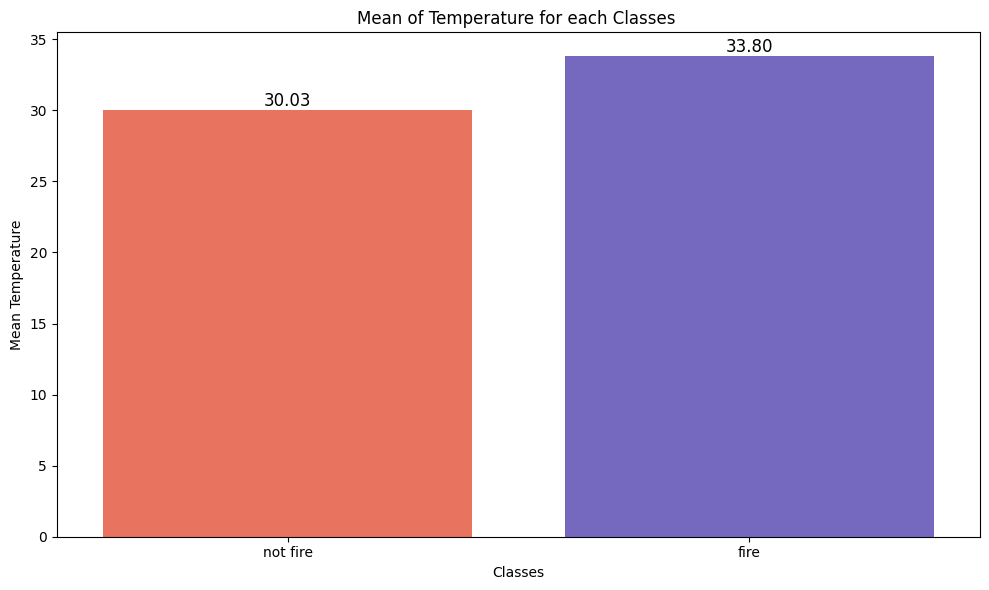

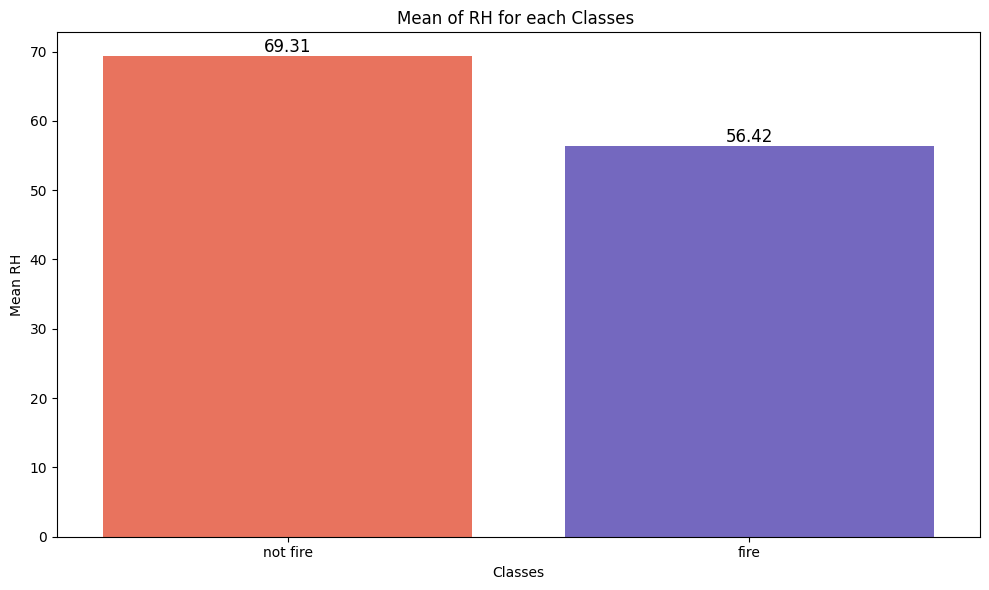

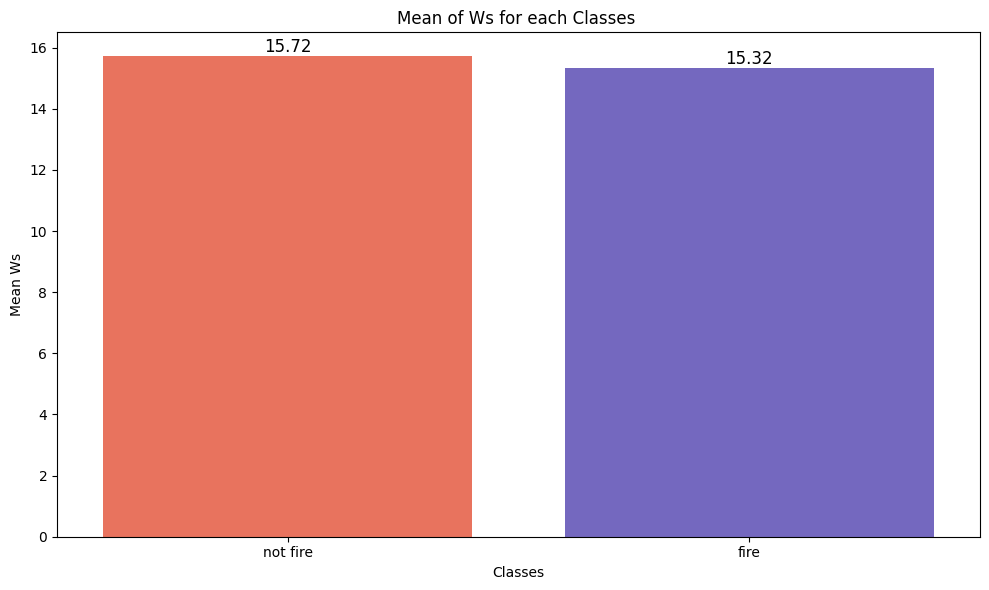

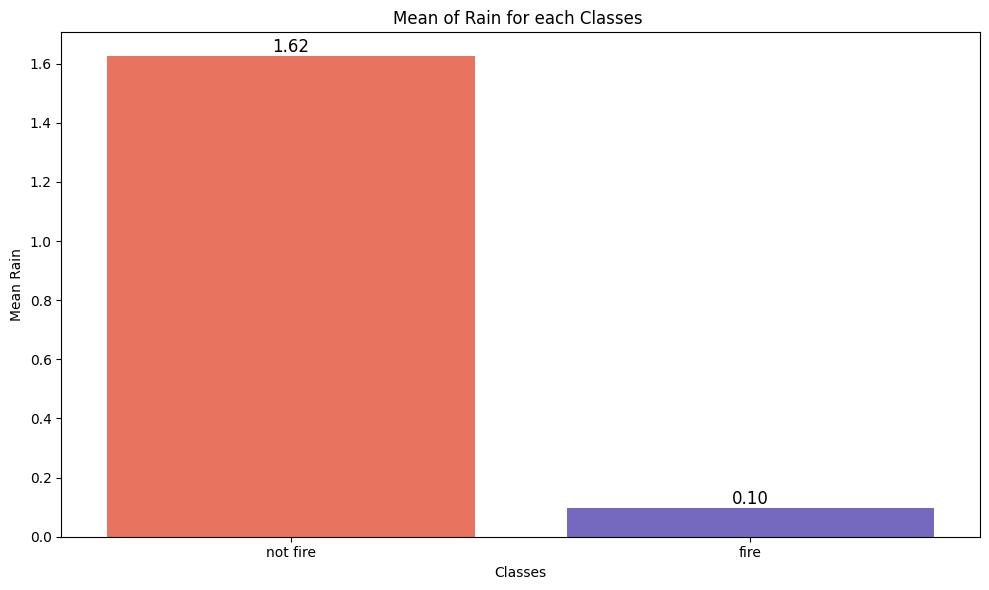

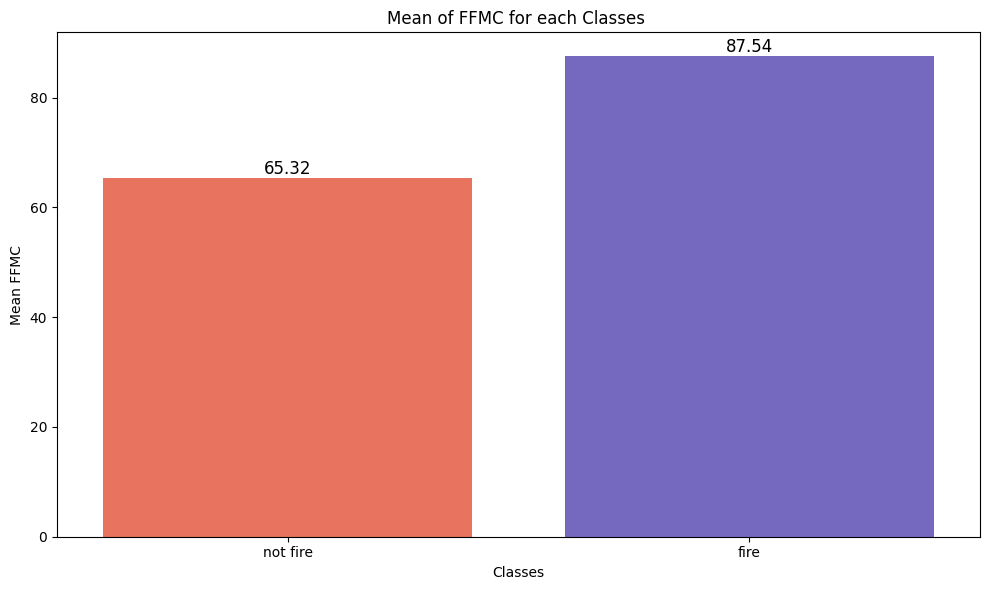

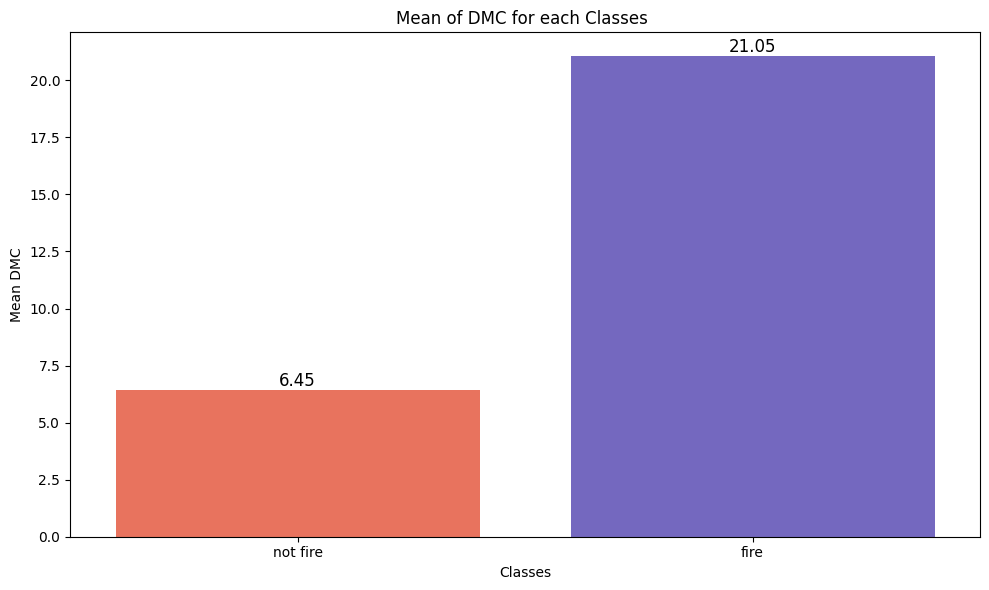

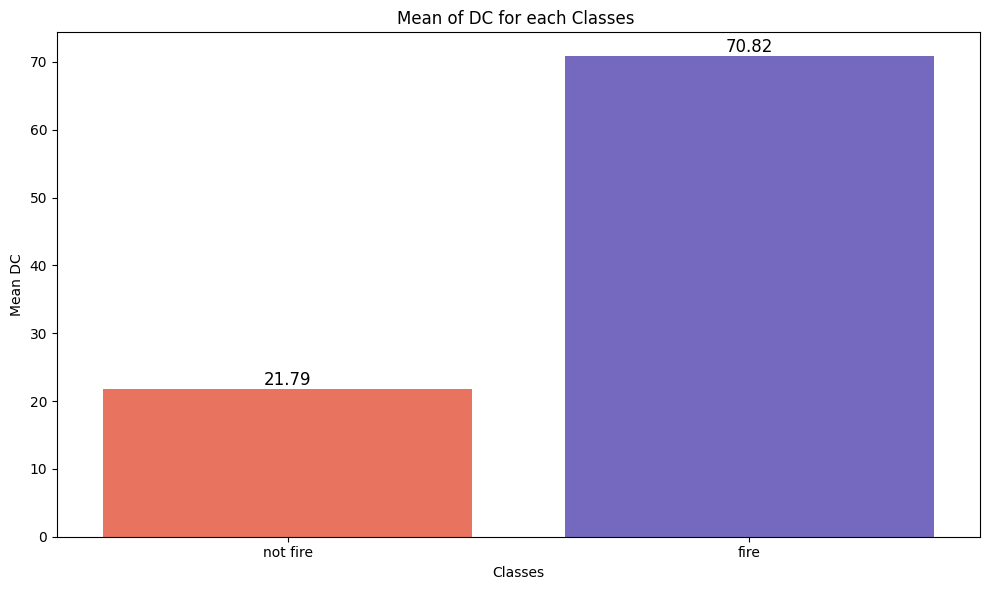

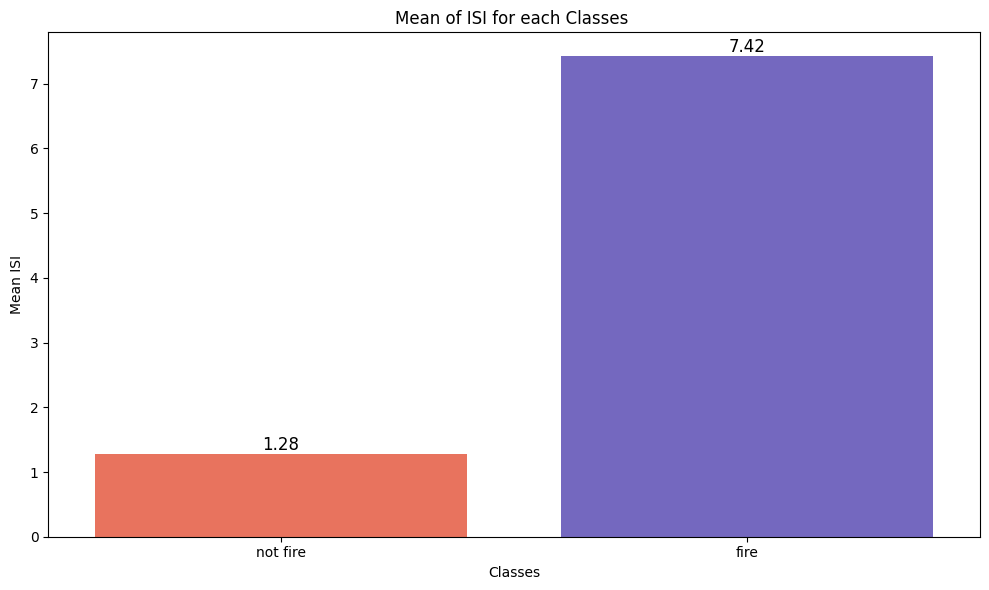

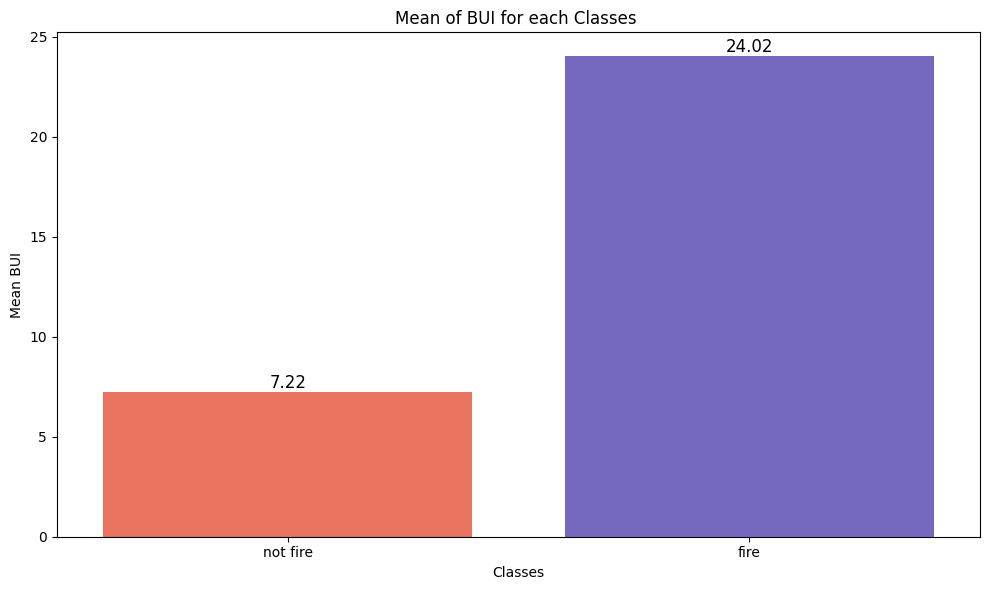

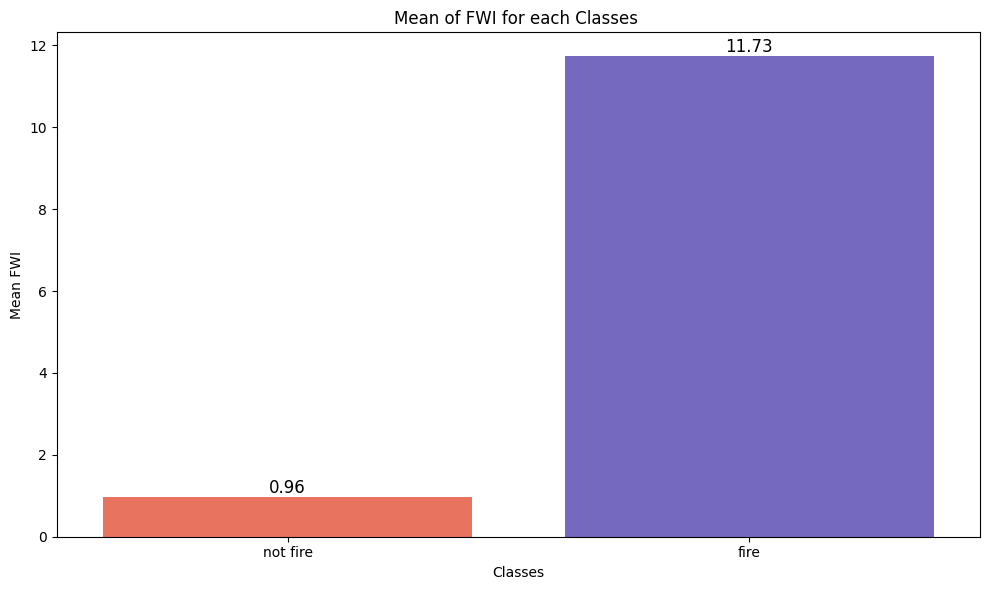

In [70]:
for i in numCol:   
    plot_mean_by_category(
        data, 
        categorical_col='Classes', 
        numerical_col=i, 
        palette=custom_colors, 
        title=f'Mean of {i} for each Classes ', 
        xlabel='Classes', 
        ylabel=f'Mean {i}'
    )

# plot categorical and categorical

In [71]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def plot_grouped_bar_with_annotations(data, category1, category2, palette=custom_colors, title=None, xlabel=None, ylabel=None):
    """
    Plots a grouped bar plot with annotations on top of the bars.

    Parameters:
    - data: pd.DataFrame, the input data frame.
    - category1: str, the name of the first categorical column.
    - category2: str, the name of the second categorical column.
    - palette: list or str, the colors to use for different categories (optional).
    - title: str, the title of the plot (optional).
    - xlabel: str, the label for the x-axis (optional).
    - ylabel: str, the label for the y-axis (optional).
    """
    # Create a crosstab for plotting
    crosstab = pd.crosstab(data[category1], data[category2])

    # Reset index for easy plotting
    crosstab = crosstab.reset_index().melt(id_vars=category1, value_vars=crosstab.columns, var_name=category2, value_name='Count')

    # Grouped Bar Plot with numbers on top
    plt.figure(figsize=(10, 6))
    bar_plot = sns.barplot(x=category1, y='Count', hue=category2, data=crosstab, palette=palette)

    # Add numbers on top of the bars
    for p in bar_plot.patches:
        height = p.get_height()
        bar_plot.annotate(f'{height}', 
                          (p.get_x() + p.get_width() / 2., height), 
                          ha='center', va='center', 
                          xytext=(0, 5), 
                          textcoords='offset points')

    # Customize the plot
    if title:
        plt.title(title)
    if xlabel:
        plt.xlabel(xlabel)
    if ylabel:
        plt.ylabel(ylabel)
    plt.legend(title=category2)
    plt.show()




## plot all categorical features with target

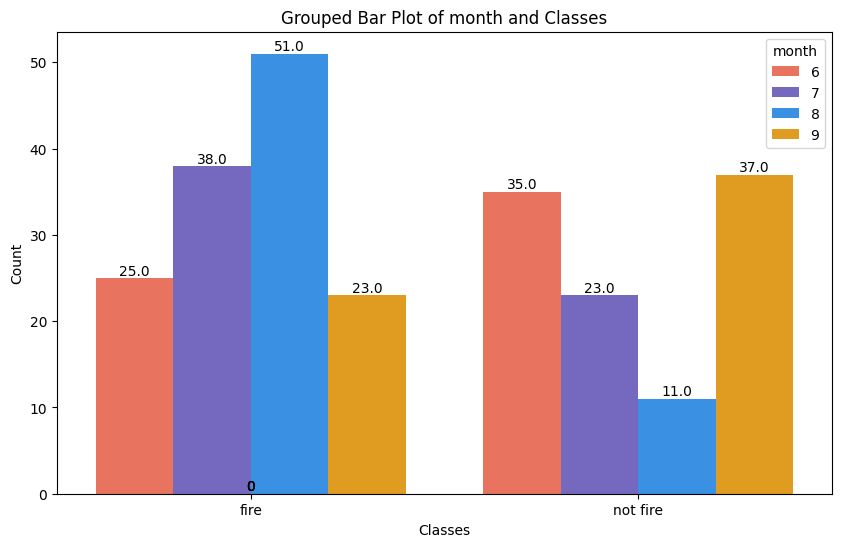

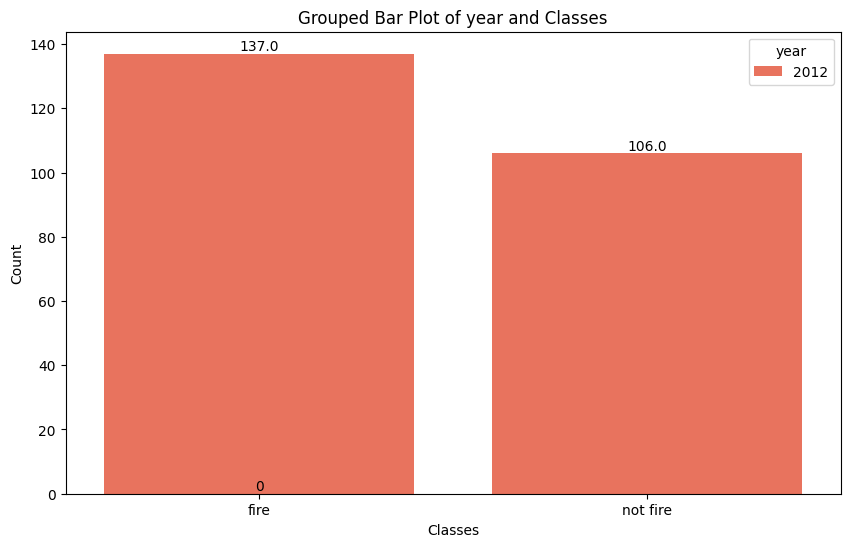

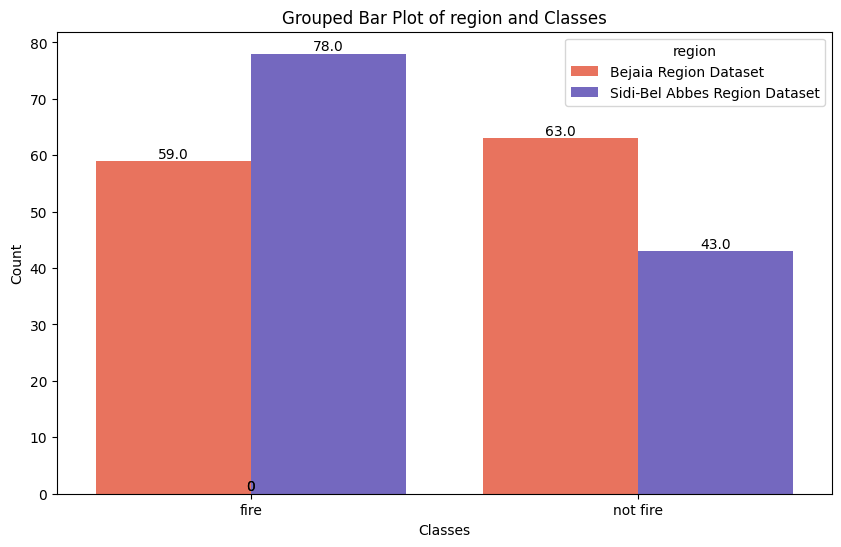

In [72]:
for i in catCol:
    if i == "Classes" or i == "day" :
        continue
    plot_grouped_bar_with_annotations(
        data, 
        category1='Classes', 
        category2=i, 
        palette=custom_colors, 
        title=f'Grouped Bar Plot of {i} and Classes', 
        xlabel='Classes', 
        ylabel='Count'
    )

# plot count for each category as bars

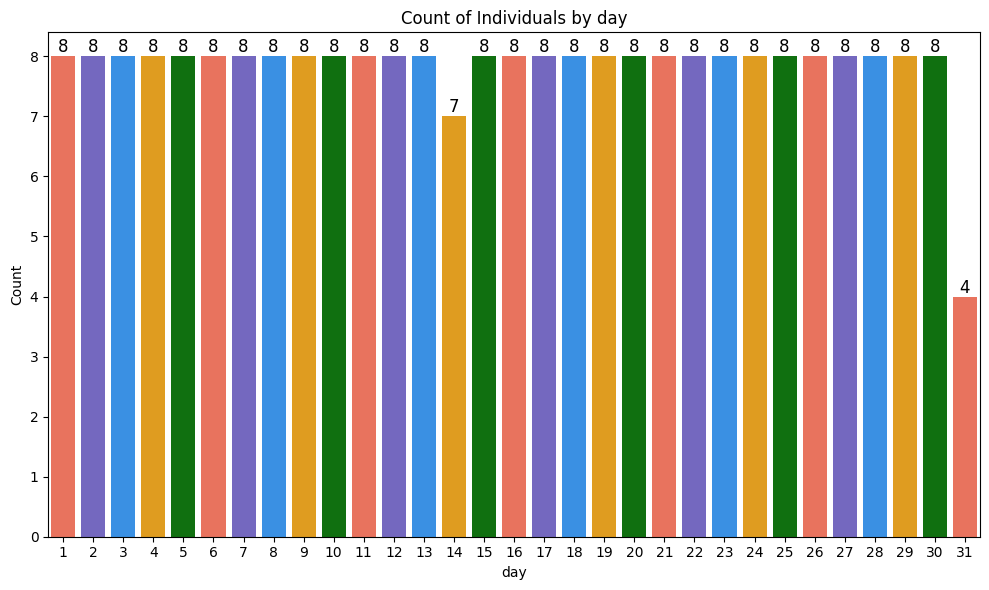

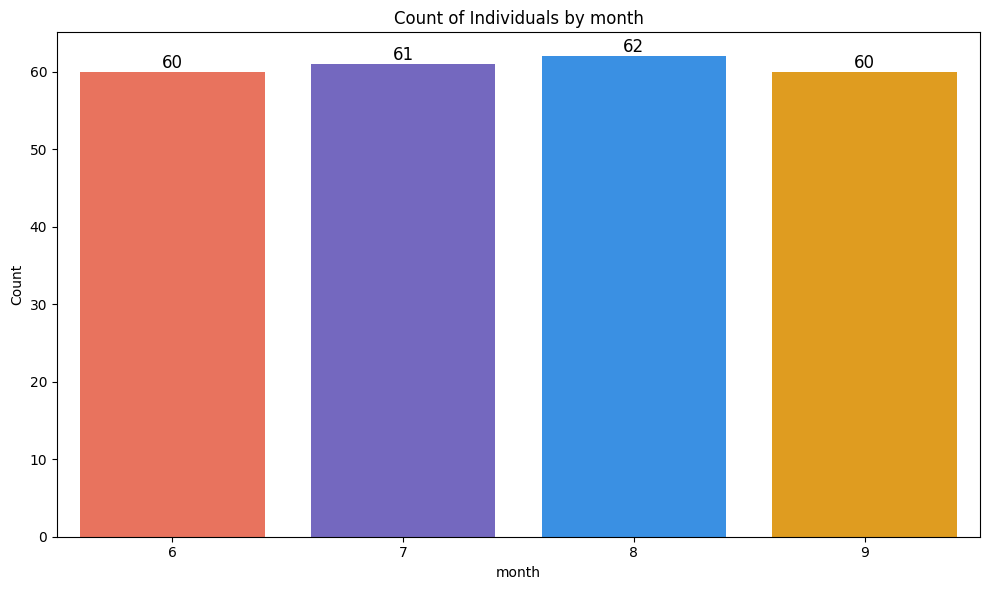

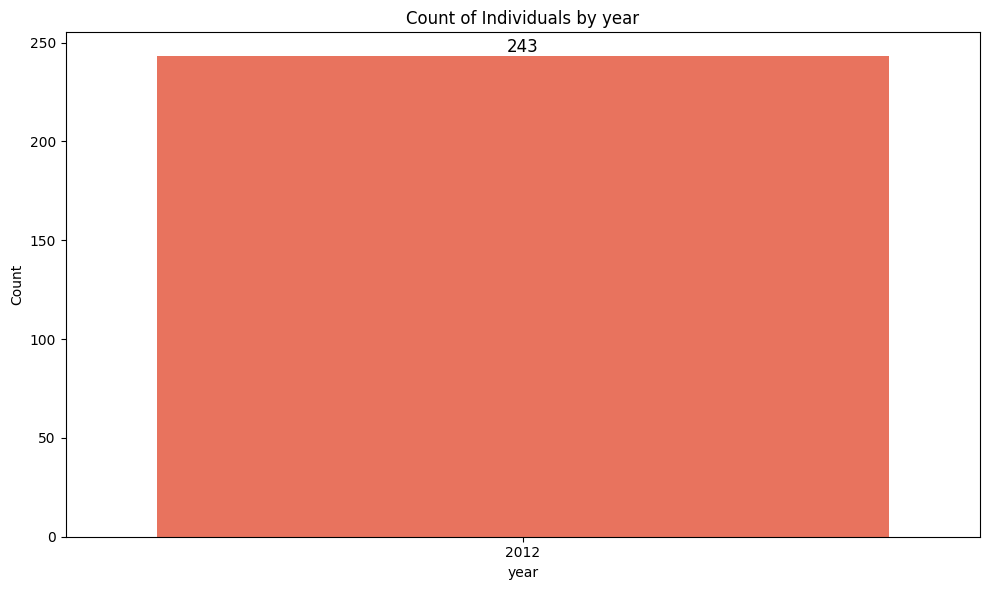

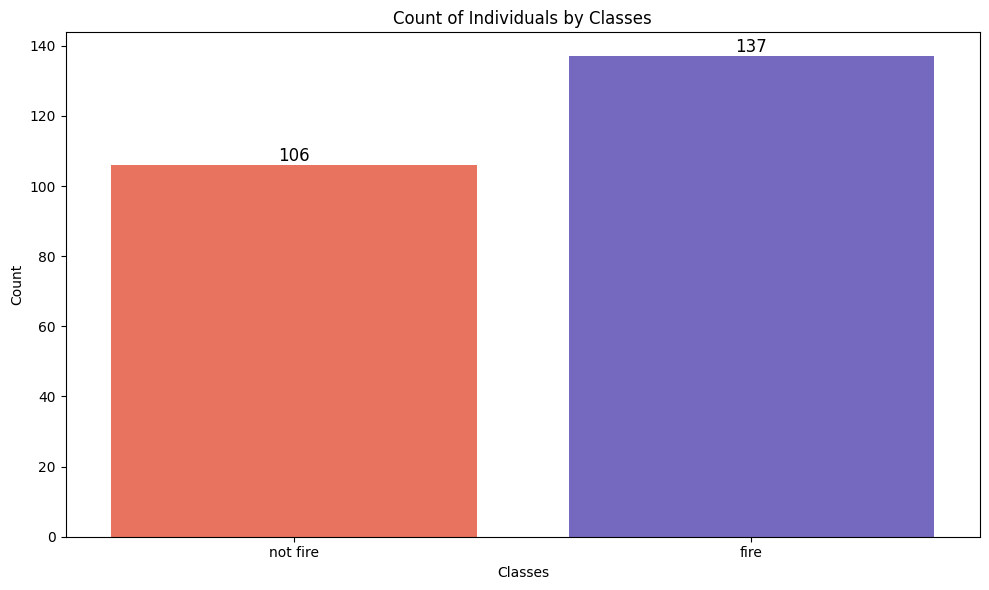

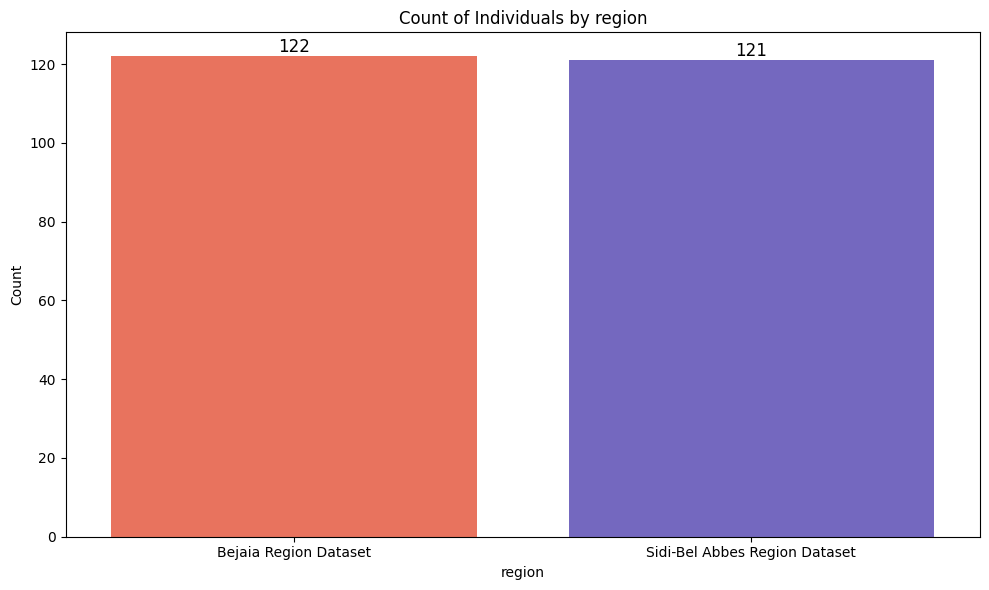

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_count_by_category(data, categorical_col, palette=custom_colors, title=None, xlabel=None, ylabel=None):
    """
    Plots the count of occurrences for each category in a categorical column.

    Parameters:
    - data: pd.DataFrame, the input data frame.
    - categorical_col: str, the name of the categorical column.
    - palette: list or str, the colors to use for different categories (optional).
    - title: str, the title of the plot (optional).
    - xlabel: str, the label for the x-axis (optional).
    - ylabel: str, the label for the y-axis (optional).
    """
    plt.figure(figsize=(10, 6))
    sns.countplot(x=categorical_col, data=data, palette=palette)
    
    # Add count values above the bars
    ax = plt.gca()
    for p in ax.patches:
        ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
                fontsize=12, color='black', ha='center', va='bottom')
    
    # Customize the plot
    if title:
        plt.title(title)
    if xlabel:
        plt.xlabel(xlabel)
    if ylabel:
        plt.ylabel(ylabel)
    else:
        plt.ylabel('Count')
        
    plt.tight_layout()
    plt.show()



    
for i in catCol:  
    plot_count_by_category(
        catData, 
        categorical_col=i, 
        palette=custom_colors, 
        title=f'Count of Individuals by {i}', 
        xlabel=f'{i}', 
        ylabel='Count'
    )

# plot count for each category as pie

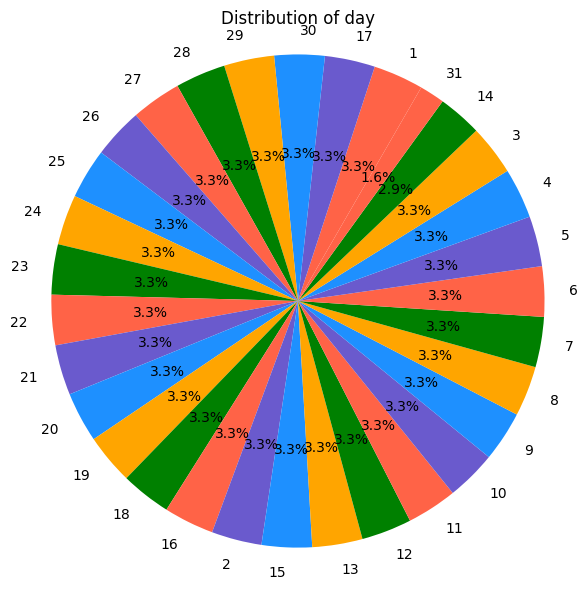

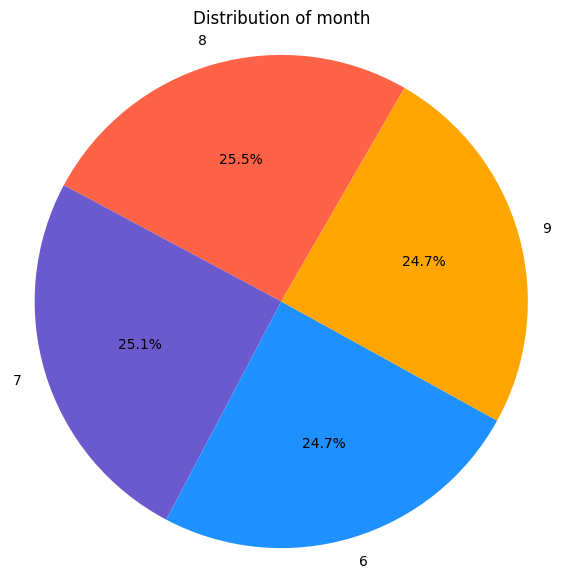

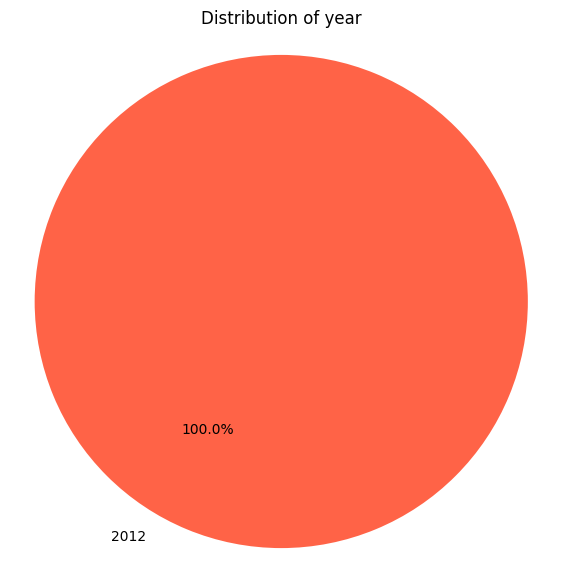

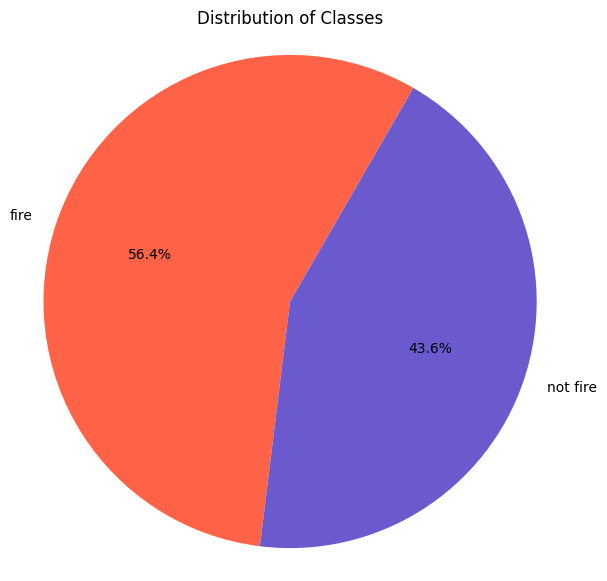

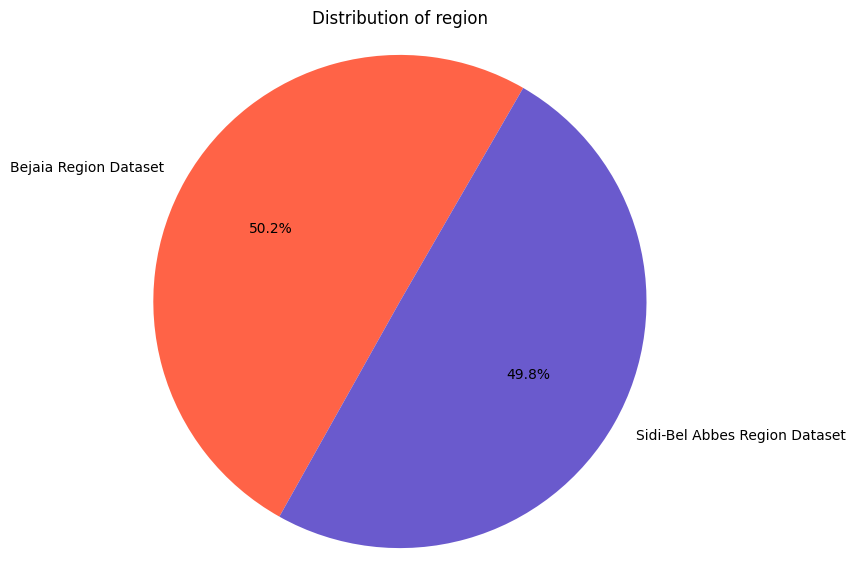

In [74]:
import pandas as pd
import matplotlib.pyplot as plt

def pie_plot(df, column, colors=custom_colors, title=None):
    """
    Plots a pie chart for the given column in the DataFrame.

    Parameters:
    - df: pd.DataFrame, the input data frame.
    - column: str, the name of the column to plot.
    - colors: list or str, the colors to use for different categories (optional).
    - title: str, the title of the plot (optional).
    """
    # Count the occurrences of each category in the column
    counts = df[column].value_counts()
    
    # Default colors if not provided
    if colors is None:
        colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6']
    
    # Plotting the pie chart
    # startangle=np.random.randint(10,180,size=1)
    # print(startangle)
    plt.figure(figsize=(7, 7))
    plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=60, colors=colors[:len(counts)])
    
    # Customize the plot
    if title:
        plt.title(title)
    else:
        plt.title(f'Pie Chart of {column}')
    
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()
    
for i in catCol:   
    pie_plot(
        df=catData, 
        column=i, 
        colors=custom_colors, 
        title=f'Distribution of {i}'
    )

# Plot distribution for each numerical column

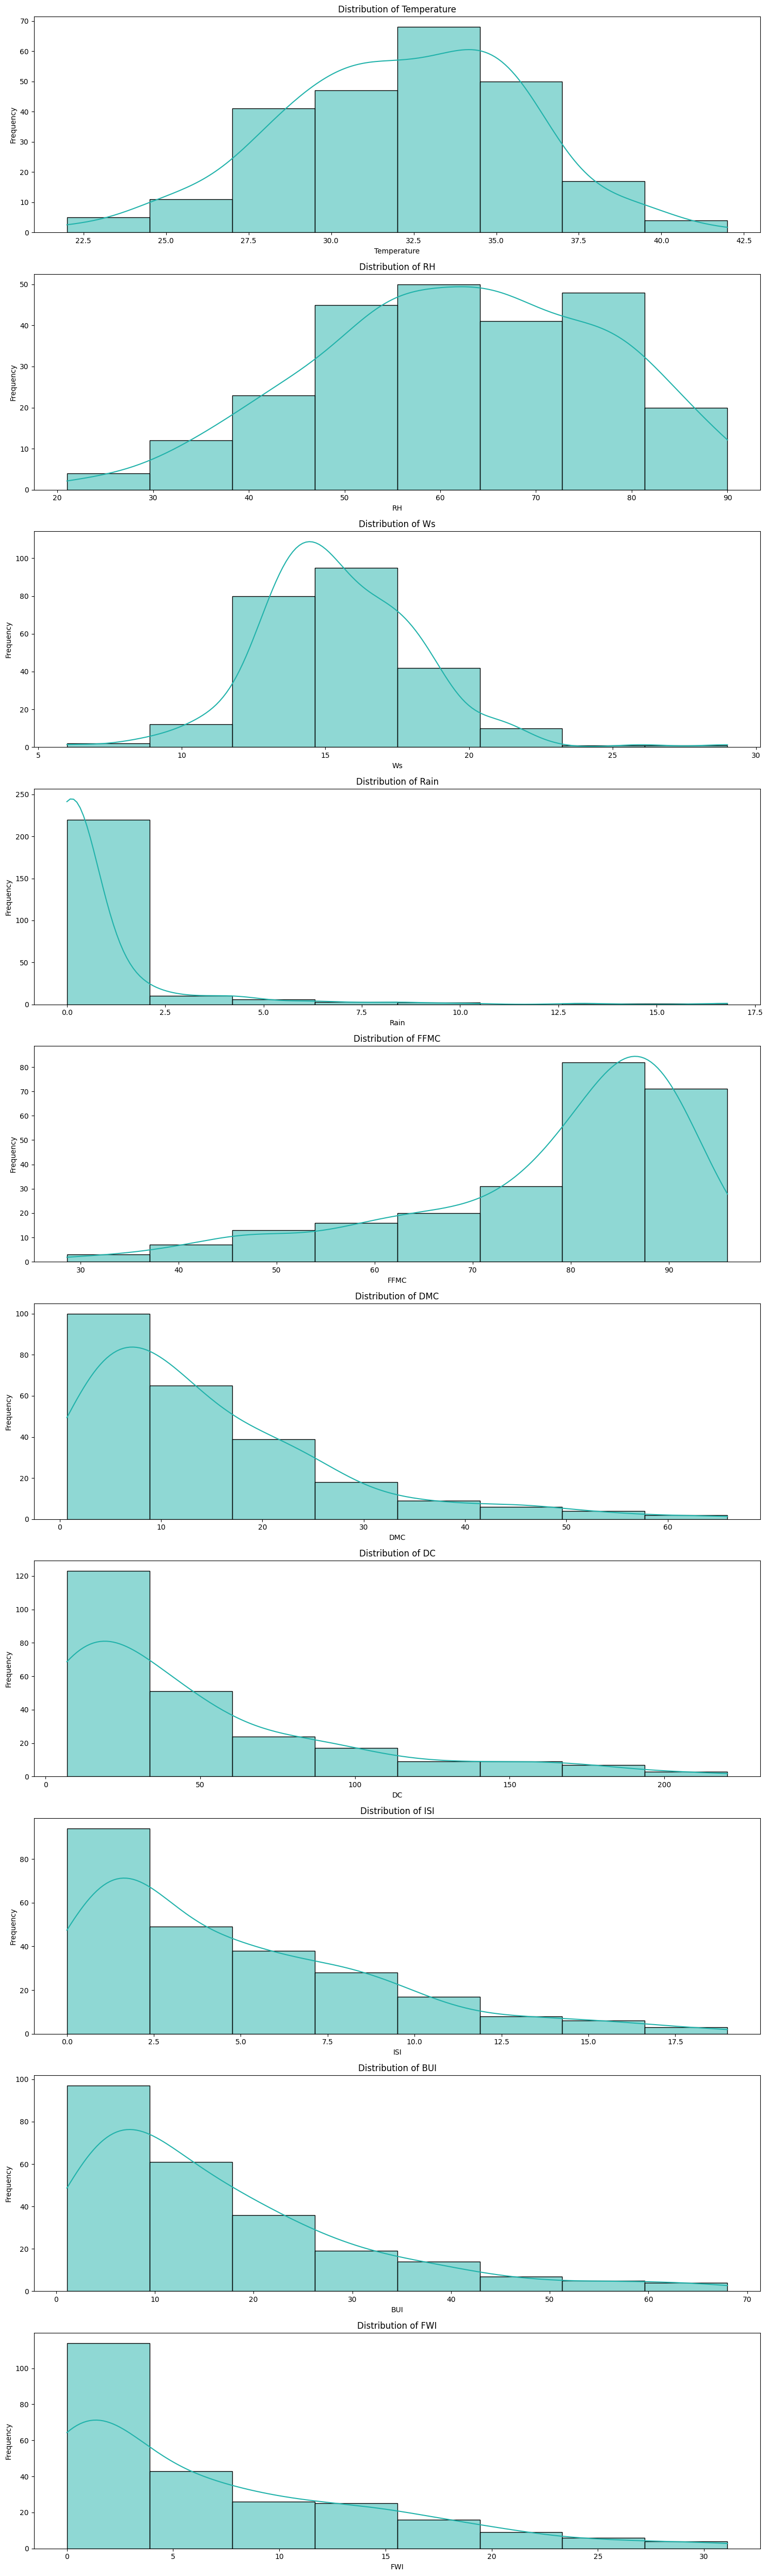

In [75]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def plot_numerical_distributions(df, columns=None, bins=10, kde=True,color="#FFA500"):
    """
    Plots the distribution for each numerical column in the DataFrame.

    Parameters:
    - df: pd.DataFrame, the input data frame.
    - columns: list of str, specific numerical columns to plot. If None, all numerical columns are plotted (optional).
    - bins: int, number of bins for the histogram (optional, default is 10).
    - kde: bool, whether to include KDE plot along with histogram (optional, default is True).
    """
    # If no specific columns are provided, use all numerical columns
    if columns is None:
        columns = df.select_dtypes(include='number').columns

    num_columns = len(columns)
    
    # Create a subplot for each numerical column
    plt.figure(figsize=(15, 5 * num_columns))
    
    for i, col in enumerate(columns, 1):
        plt.subplot(num_columns, 1, i)
        sns.histplot(df[col], bins=bins, kde=kde,color=f'{color}')
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
    
    plt.tight_layout()
    plt.show()



plot_numerical_distributions(
    df=numData, 
    columns=numCol,
    bins=8,
    color="#20B2AA",
    kde=True
)


# plot corrolation for each numerical column

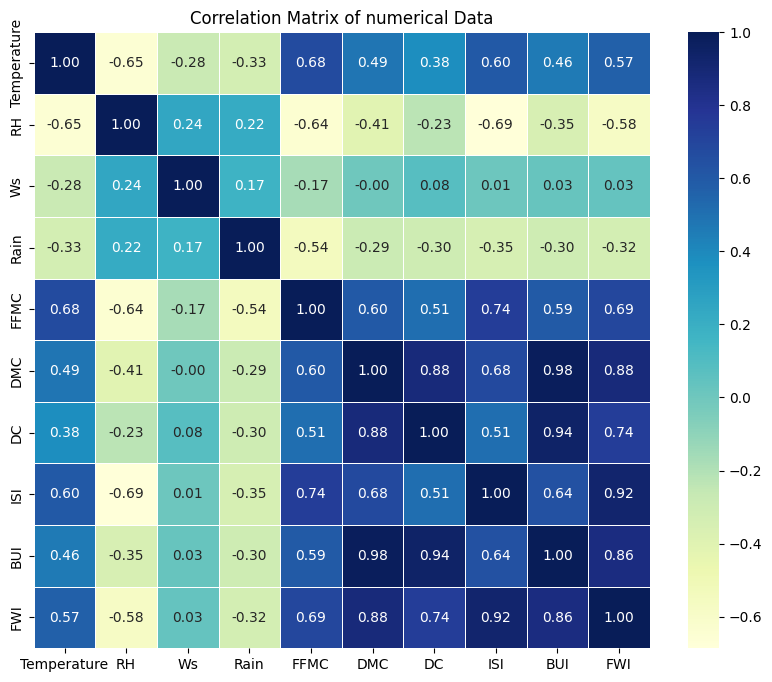

In [76]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def plot_correlation_matrix(df, title=None, cmap='coolwarm'):
    """
    Plots the correlation matrix for numerical columns in the DataFrame.

    Parameters:
    - df: pd.DataFrame, the input data frame.
    - title: str, the title of the plot (optional).
    - cmap: str or colormap, the colormap to use for the heatmap (optional).
    """
    # Calculate the correlation matrix
    corr_matrix = df.corr()

    # Plotting the heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap=cmap, fmt=".2f", linewidths=0.5, square=True)
    
    # Customize the plot
    if title:
        plt.title(title)
    else:
        plt.title('Correlation Matrix')
    
    plt.show()



plot_correlation_matrix(
    df=numData, 
    title='Correlation Matrix of numerical Data',
    cmap='YlGnBu'
)


In [77]:
data.head(1)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,Bejaia Region Dataset



# Statistical Tests

### split data to features and target

In [78]:
# split data to features and target
print(data.shape)
y = data["Classes"]
x = data.drop(["Classes"],axis=1)
print(x.shape)
print(y.shape)

(243, 15)
(243, 14)
(243,)


In [79]:
mapp={
    "Bejaia Region Dataset": 0,
    "Sidi-Bel Abbes Region Dataset":1
    }

x["region_encoded"]=x["region"].replace(mapp)
x

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,region,region_encoded
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,Bejaia Region Dataset,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,Bejaia Region Dataset,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,Bejaia Region Dataset,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,Bejaia Region Dataset,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,Bejaia Region Dataset,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,Sidi-Bel Abbes Region Dataset,1
240,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,Sidi-Bel Abbes Region Dataset,1
241,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,Sidi-Bel Abbes Region Dataset,1
242,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,Sidi-Bel Abbes Region Dataset,1


In [80]:
encoded_x=x.drop(["region","year","month","day"],axis=1)

In [81]:
encoded_x.info()

<class 'pandas.core.frame.DataFrame'>
Index: 243 entries, 0 to 243
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Temperature     243 non-null    int64  
 1   RH              243 non-null    int64  
 2   Ws              243 non-null    int64  
 3   Rain            243 non-null    float64
 4   FFMC            243 non-null    float64
 5   DMC             243 non-null    float64
 6   DC              243 non-null    float64
 7   ISI             243 non-null    float64
 8   BUI             243 non-null    float64
 9   FWI             243 non-null    float64
 10  region_encoded  243 non-null    int64  
dtypes: float64(7), int64(4)
memory usage: 22.8 KB


In [82]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data

selected_Features=calculate_vif(encoded_x)
selected_Features

,Feature,VIF
0,Temperature,99.837511
1,RH,31.406445
2,Ws,34.776930
3,Rain,1.653821
4,FFMC,105.226816
5,DMC,201.052935
6,DC,51.625840
7,ISI,52.403744
8,BUI,412.547369
9,FWI,76.981488


## Note
###  highly redundant features so we need to drop them but we will check agin using Statistical Tests

In [83]:
selected_Features[selected_Features["VIF"]>99]

,Feature,VIF
0,Temperature,99.837511
4,FFMC,105.226816
5,DMC,201.052935
8,BUI,412.547369


# categorical feature with categorical target (chi^2)

In [84]:
import pandas as pd
from scipy.stats import chi2_contingency

def chi_square_categorical(data, categorical_feature, categorical_target):
    """
    Perform Chi-square test of independence between a categorical feature and a categorical target.

    Parameters:
    - data: pd.DataFrame, the input DataFrame containing both categorical_feature and categorical_target.
    - categorical_feature: str, the name of the categorical feature column in data.
    - categorical_target: str, the name of the categorical target column in data.

    Returns:
    - chi2_stat: float, the chi-square test statistic.
    - p_value: float, the p-value from the chi-square test.
    - dof: int, the degrees of freedom.
    - expected: 2D array, the expected frequencies, given the null hypothesis.
    """
    contingency_table = pd.crosstab(data[categorical_feature], data[categorical_target])
    chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
    
    return chi2_stat, p_value, dof, expected


# chi2_stat, p_val, dof, expected = chi_square_categorical(data, 'region', 'Classes')
# print(f"Chi-square statistic: {chi2_stat:.4f}, p-value: {p_val:.4f}")


for i in catCol:
    chi2_stat, p_val, dof, expected = chi_square_categorical(data, i, 'Classes')
    print("="*100)
    print(i)
    print(f"Chi-square statistic: {chi2_stat:.4f}, p-value: {p_val:.4f}")
    print("="*100)



day
Chi-square statistic: 32.2124, p-value: 0.3577
month
Chi-square statistic: 30.9777, p-value: 0.0000
year
Chi-square statistic: 0.0000, p-value: 1.0000
Classes
Chi-square statistic: 238.9508, p-value: 0.0000
region
Chi-square statistic: 5.7666, p-value: 0.0163


# numerical feature with categorical target (ANOVA)

In [85]:
import pandas as pd
from scipy.stats import f_oneway

def anova_numerical_categorical(data, numerical_feature, categorical_target):
    """
    Perform ANOVA between a numerical feature and a categorical target.

    Parameters:
    - data: pd.DataFrame, the input DataFrame containing both numerical_feature and categorical_target.
    - numerical_feature: str, the name of the numerical feature column in data.
    - categorical_target: str, the name of the categorical target column in data.

    Returns:
    - f_statistic: float, the F-statistic from ANOVA.
    - p_value: float, the p-value from ANOVA.
    """
    # Separate numerical features by category
    grouped_data = [data[numerical_feature][data[categorical_target] == category] for category in data[categorical_target].unique()]

    # Perform ANOVA
    f_statistic, p_value = f_oneway(*grouped_data)

    return f_statistic, p_value


# f_stat, p_val = anova_numerical_categorical(data, 'Rain', 'Classes')
# print(f"F-statistic: {f_stat:.4f}, p-value: {p_val:.4f}")

for i in numCol:
    f_stat, p_val = anova_numerical_categorical(data, i, 'Classes')
    print("="*100)
    print(i)
    print(f"F-statistic: {f_stat:.4f}, p-value: {p_val:.4f}")
    print("="*100)


Temperature
F-statistic: 87.4596, p-value: 0.0000
RH
F-statistic: 55.3465, p-value: 0.0000
Ws
F-statistic: 1.1855, p-value: 0.2773
Rain
F-statistic: 40.4482, p-value: 0.0000
FFMC
F-statistic: 349.8577, p-value: 0.0000
DMC
F-statistic: 125.8161, p-value: 0.0000
DC
F-statistic: 85.2254, p-value: 0.0000
ISI
F-statistic: 283.5005, p-value: 0.0000
BUI
F-statistic: 126.4598, p-value: 0.0000
FWI
F-statistic: 258.2458, p-value: 0.0000


In [86]:
yData=y
yData

0      not fire
1      not fire
2      not fire
3      not fire
4      not fire
         ...   
239        fire
240    not fire
241    not fire
242    not fire
243    not fire
Name: Classes, Length: 243, dtype: object

In [87]:
yData[yData=="not fire"]=0
yData[yData=="fire"]=1
yData=yData.astype('Float64')
yData

C:\Users\moham\AppData\Local\Temp\ipykernel_11240\4180674813.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yData[yData=="not fire"]=0
C:\Users\moham\AppData\Local\Temp\ipykernel_11240\4180674813.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yData[yData=="fire"]=1


0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
239    1.0
240    0.0
241    0.0
242    0.0
243    0.0
Name: Classes, Length: 243, dtype: Float64

## calculate variance for categorical features

In [88]:
x.drop(["region"],axis=1,inplace=True)

vars=[]
for i in x.columns:
    vars.append(x[i].var())
    print(i,"  ",x[i].var()) 
    
    


day    78.19072883719346
month    1.2427643437744451
year    0.0
Temperature    13.162670475801788
RH    219.87433255110025
Ws    7.903887358432813
Rain    4.012837465564738
FFMC    205.9122041968507
DMC    153.58743427541407
DC    2272.0099938781755
ISI    17.25765874230521
BUI    202.4479678944325
FWI    55.36204809033092
region_encoded    0.25102880658436205


### Note: year is a constant variable so we need to drop it

## after Statistical Tests we need to drop some columns

In [89]:
xData=x.drop(["day","year","Ws"],axis=1)
xData

,month,Temperature,RH,Rain,FFMC,DMC,DC,ISI,BUI,FWI,region_encoded
0,6,29,57,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0
1,6,29,61,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0
2,6,26,82,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0
3,6,25,89,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0
4,6,27,77,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0
...,...,...,...,...,...,...,...,...,...,...,...
239,9,30,65,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1
240,9,28,87,4.4,41.1,6.5,8.0,0.1,6.2,0.0,1
241,9,27,87,0.5,45.9,3.5,7.9,0.4,3.4,0.2,1
242,9,24,54,0.1,79.7,4.3,15.2,1.7,5.1,0.7,1


# split data

In [90]:
xtrain ,xtest,ytrain,ytest =train_test_split(xData,yData,test_size=.20,random_state=42)

print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)

(194, 11)
(194,)
(49, 11)
(49,)


In [91]:
ytrain=pd.DataFrame(ytrain)

## save data

In [92]:
dump_path="C:/Users/moham/OneDrive/Desktop/Proj AI/Algerian_forest_fires/data/processed"
xtrain.to_csv(f"{dump_path}/xtrain.csv")
ytrain.to_csv(f"{dump_path}/ytrain.csv")
xtest.to_csv(f"{dump_path}/xtest.csv")
ytest.to_csv(f"{dump_path}/ytest.csv")


## load data

In [93]:

dump_path="C:/Users/moham/OneDrive/Desktop/Proj AI/Algerian_forest_fires/data/processed"
xtrain=pd.read_csv(f"{dump_path}/xtrain.csv", usecols=lambda column: column != 'Unnamed: 0')
ytrain=pd.read_csv(f"{dump_path}/ytrain.csv", usecols=lambda column: column != 'Unnamed: 0')
xtest=pd.read_csv(f"{dump_path}/xtest.csv", usecols=lambda column: column != 'Unnamed: 0')
ytest=pd.read_csv(f"{dump_path}/ytest.csv", usecols=lambda column: column != 'Unnamed: 0')

print("xtrain shape ",xtrain.shape)
print("ytrain shape ",ytrain.shape)
print("xtest  shape ",xtest.shape)
print("ytest  shape ",ytest.shape)



xtrain shape  (194, 11)
ytrain shape  (194, 1)
xtest  shape  (49, 11)
ytest  shape  (49, 1)


# RandomForestClassifier model

Training Accuracy: 1.0000
Testing Accuracy: 0.9796

Classification Report:
               precision    recall  f1-score   support

         0.0       0.96      1.00      0.98        22
         1.0       1.00      0.96      0.98        27

    accuracy                           0.98        49
   macro avg       0.98      0.98      0.98        49
weighted avg       0.98      0.98      0.98        49



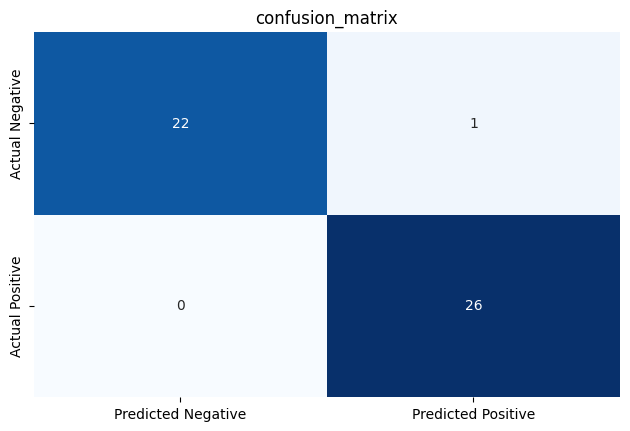

In [94]:
RF_model = RandomForestClassifier(n_estimators=100, random_state=42)
RF_model.fit(xtrain, ytrain)

y_train_prd=RF_model.predict(xtrain)
y_test_pred = RF_model.predict(xtest)


print(f"Training Accuracy: {accuracy_score(y_train_prd,ytrain):.4f}")
print(f"Testing Accuracy: {accuracy_score(ytest, y_test_pred):.4f}")
print("\nClassification Report:\n", classification_report(ytest, y_test_pred))


CM=confusion_matrix(y_test_pred,ytest,)
sns.heatmap(CM, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title("confusion_matrix")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig(f'confusion_matrix.png', bbox_inches='tight', dpi=300)
# plt.savefig(f'C:/Users/moham/OneDrive/Desktop/Proj AI/Algerian_forest_fires/data/out/confusion_matrix.png', bbox_inches='tight', dpi=300)

# LogisticRegression model

Training Accuracy: 0.9948
Testing Accuracy: 0.9796

Classification Report:
               precision    recall  f1-score   support

         0.0       0.96      1.00      0.98        22
         1.0       1.00      0.96      0.98        27

    accuracy                           0.98        49
   macro avg       0.98      0.98      0.98        49
weighted avg       0.98      0.98      0.98        49



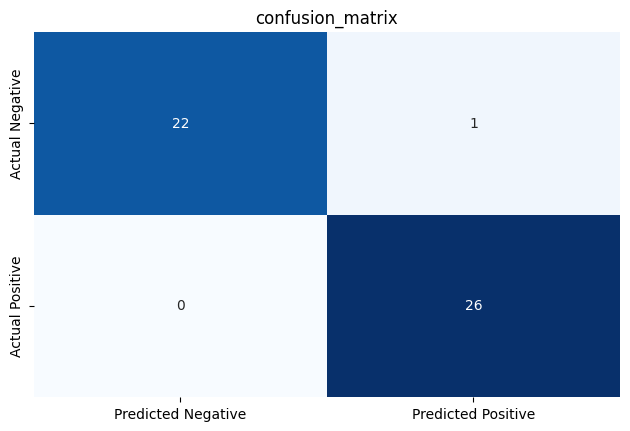

In [95]:
cls=LogisticRegression()
cls.fit(xtrain,ytrain)
y_train_prd=cls.predict(xtrain)
y_test_pred = cls.predict(xtest)


print(f"Training Accuracy: {accuracy_score(y_train_prd,ytrain):.4f}")
print(f"Testing Accuracy: {accuracy_score(ytest, y_test_pred):.4f}")
print("\nClassification Report:\n", classification_report(ytest, y_test_pred))


CM=confusion_matrix(y_test_pred,ytest,)
sns.heatmap(CM, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title("confusion_matrix")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig(f'confusion_matrix.png', bbox_inches='tight', dpi=300)

# data normalization 

In [96]:
s=StandardScaler()
scaledxtrain=s.fit_transform(xtrain)
scaledxtest=s.transform(xtest)

Training Accuracy: 1.0000
Testing Accuracy: 0.9796

Classification Report:
               precision    recall  f1-score   support

         0.0       0.96      1.00      0.98        22
         1.0       1.00      0.96      0.98        27

    accuracy                           0.98        49
   macro avg       0.98      0.98      0.98        49
weighted avg       0.98      0.98      0.98        49



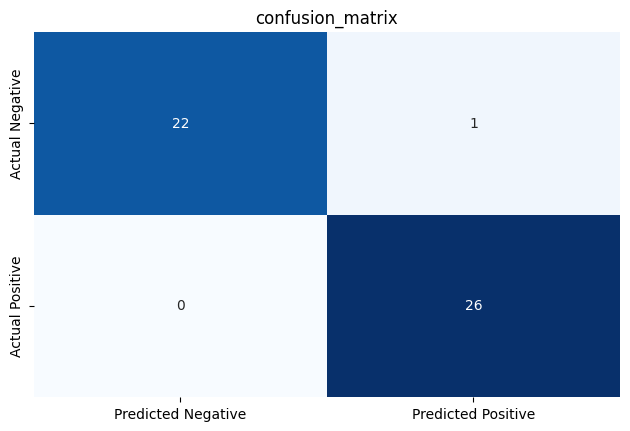

In [97]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(scaledxtrain, ytrain)

y_train_prd=rf_model.predict(scaledxtrain)
y_test_pred = rf_model.predict(scaledxtest)


print(f"Training Accuracy: {accuracy_score(y_train_prd,ytrain):.4f}")
print(f"Testing Accuracy: {accuracy_score(ytest, y_test_pred):.4f}")
print("\nClassification Report:\n", classification_report(ytest, y_test_pred))


CM=confusion_matrix(y_test_pred,ytest,)
sns.heatmap(CM, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title("confusion_matrix")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig(f'confusion_matrix.png', bbox_inches='tight', dpi=300)


